In [206]:
import os
import pandas as pd
from sklearn.preprocessing import Imputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Reading the data

In [207]:
b_data=pd.read_csv("bank_data.csv",na_values="")

In [208]:
#Checking the top rows of the data
b_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904,No
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267,No
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481,No
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509,No
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870,No


In [211]:
#Checking the data types,shape of the dataset
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [212]:
#Checking the summary statistics of the data
b_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,24990.000000,24990.000000,24990.000000,24910.000000,2.495100e+04,24990.000000,24990.000000,24931.000000,24988.000000,24990.000000,...,2.499600e+04,2.491300e+04,24989.000000,2.494200e+04,24989.000000,2.322600e+04,24935.000000,2.491300e+04,24910.000000,24469.000000
mean,-0.025399,0.674995,0.048404,5.433537,-2.011619e+02,-0.121430,0.025566,8.587400,2.546445,0.617376,...,6.972576e+03,-4.530407e+01,-0.106698,4.901334e+01,2.479371,3.959328e+02,17.266378,1.613429e+03,8.776456,58.241379
std,4.834482,6.586872,6.573579,181.872588,2.929780e+04,8.790638,4.954985,297.912558,46.266459,16.707811,...,7.213189e+04,7.022098e+03,12.346187,7.028316e+03,213.995088,2.517297e+04,687.213040,1.661766e+05,56.788089,1296.960654
min,-463.890000,-2.421800,-479.960000,-0.403110,-2.722100e+06,-508.410000,-463.890000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1236.300000,-1.986900e+02,-284.380000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-3.726500
25%,0.000445,0.289430,0.000000,1.006500,-5.758000e+01,-0.002932,0.002026,0.364790,1.018775,0.257872,...,8.762750e-02,7.431300e-03,0.008628,8.751700e-01,0.000000,5.461375e+00,4.551100,4.401100e+01,2.944900,2.196730
50%,0.044284,0.504040,0.174070,1.495850,-6.096100e+00,0.000000,0.053477,0.967690,1.210900,0.474620,...,8.757900e+02,4.974600e-02,0.117340,9.517900e-01,0.013621,9.613650e+00,6.680700,7.620729e+01,4.844703,4.207215
75%,0.126060,0.726772,0.383167,2.688350,4.581100e+01,0.062831,0.146965,2.460100,2.043200,0.688520,...,4.583973e+03,1.273900e-01,0.285450,9.931300e-01,0.293780,2.020900e+01,10.371000,1.259001e+02,8.417800,9.629100
max,94.280000,480.960000,22.769000,27146.000000,1.250100e+06,303.670000,186.430000,29636.000000,3876.100000,1027.200000,...,4.398400e+06,2.931500e+02,147.190000,1.108300e+06,23853.000000,3.660200e+06,108000.000000,2.501600e+07,7641.300000,127680.000000


In [213]:
## Comparing Mean and Median
diff=b_data.describe().iloc[[1,5],:]
diff

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
mean,-0.025399,0.674995,0.048404,5.433537,-201.161895,-0.12143,0.025566,8.58740,2.546445,0.617376,...,6972.57561,-45.304069,-0.106698,49.01334,2.479371,395.932768,17.266378,1613.428955,8.776456,58.241379
50%,0.044284,0.504040,0.174070,1.495850,-6.096100,0.00000,0.053477,0.96769,1.210900,0.474620,...,875.79000,0.049746,0.117340,0.95179,0.013621,9.613650,6.680700,76.207292,4.844703,4.207215


In [214]:
b_data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [215]:
b_data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [216]:
b_data.var()

Attr1     2.337222e+01
Attr2     4.338688e+01
Attr3     4.321194e+01
Attr4     3.307764e+04
Attr5     8.583610e+08
Attr6     7.727532e+01
Attr7     2.455188e+01
Attr8     8.875189e+04
Attr9     2.140585e+03
Attr10    2.791510e+02
Attr11    1.974469e+01
Attr12    3.847281e+03
Attr13    9.048030e+03
Attr14    2.455188e+01
Attr15    1.198220e+10
Attr16    4.073122e+03
Attr17    9.118877e+04
Attr18    2.494066e+01
Attr19    3.024352e+02
Attr20    2.448316e+09
Attr21    2.669948e+03
Attr22    1.945890e+01
Attr23    2.868501e+02
Attr24    6.031708e+01
Attr25    2.983965e+02
Attr26    3.679847e+03
Attr27    3.826946e+08
Attr28    1.299912e+04
Attr29    6.816842e-01
Attr30    9.502292e+05
              ...     
Attr35    1.410755e+01
Attr36    2.180275e+03
Attr37    1.206023e+07
Attr38    2.790592e+02
Attr39    4.086384e+03
Attr40    2.190009e+03
Attr41    1.430473e+03
Attr42    2.511811e+02
Attr43    3.714655e+10
Attr44    2.053778e+10
Attr45    1.264639e+06
Attr46    3.302348e+04
Attr47    3

In [217]:
b_data.isna().sum().sum()

29879

In [218]:
#Calculating the percentage of missing values for each attribute

Missing_Column_wise_percentage=((b_data.isna().sum())/24996)*100

# Checking which attribute has more than 25% missing values

Missing_Column_wise_percentage[Missing_Column_wise_percentage>=25]

# We observe only one attribute with missing value precentage greater than 25%

Attr37    45.879341
dtype: float64

In [219]:
#Calculating the percentage of missing values for each observation

Missing_Row_wise_percentage=(b_data.apply(lambda x: x.isna().sum(),axis=1)/64)*100

#Let's filter the observations with missing values more than 50%

Missing_Row_wise_percentage[Missing_Row_wise_percentage>=50]

#We observe that there are only 7 such observations

2817     50.0000
2916     62.5000
4836     51.5625
6680     54.6875
14234    54.6875
14574    56.2500
16373    51.5625
dtype: float64

In [220]:
# Label Encode string class values as integers
b_data.target=b_data.target.replace(["Yes","No"],[1,0])

In [221]:
#Splitting data into train and test data
X = b_data.copy().drop("target",axis=1)
y = b_data["target"]

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y,random_state=123)

In [223]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17497, 64) (7499, 64) (17497,) (7499,)


In [224]:
#Imputation Package
from sklearn.preprocessing import Imputer

In [225]:
median_imputer = Imputer(strategy = "median")

In [226]:
X_train_impute = median_imputer.fit(X_train)

In [227]:
train_imp=X_train_impute.transform(X_train)
train_imp = pd.DataFrame(train_imp)

In [228]:
test_imp=X_train_impute.transform(X_test)

In [229]:
test_imp = pd.DataFrame(test_imp)

In [230]:
#before imputation
print(X_train.isna().sum().sum(),X_test.isna().sum().sum())

20876 9003


In [231]:
#after imputation
print(train_imp.isna().sum().sum(),test_imp.isna().sum().sum())

0 0


# MODEL 1

In [232]:
## Importing Required Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [233]:
knn_classifier = KNeighborsClassifier(algorithm="brute",weights="distance")

In [234]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1,40):
   knn = KNeighborsClassifier(n_neighbors=i)
   knn.fit(train_imp,y_train)
   pred_i = knn.predict(test_imp)
   error.append(np.mean(pred_i != y_test))

Text(0.5,1,'Error vs KValue')

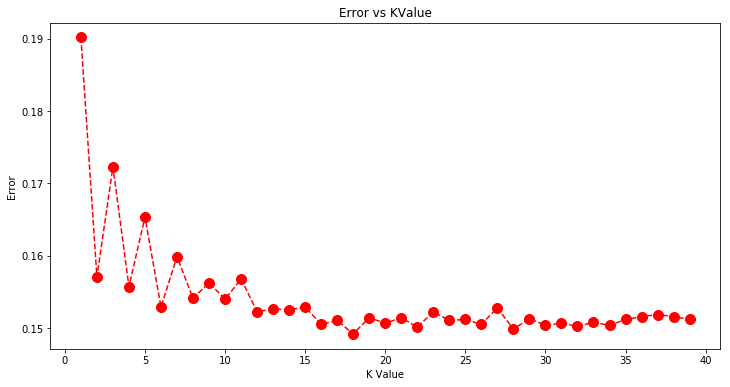

In [236]:
# Plotting Error vs K Value
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker="o",markersize=10)
plt.xlabel("K Value")
plt.ylabel("Error")
plt.title('Error vs KValue')

In [237]:
params = {"n_neighbors": [6],"metric": ["cityblock"]}
grid = GridSearchCV(knn_classifier,param_grid=params,scoring="accuracy",cv=3)

In [238]:
grid.fit(train_imp, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [6], 'metric': ['cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [239]:
grid.best_params_

{'metric': 'cityblock', 'n_neighbors': 6}

In [240]:
grid.best_score_

0.8443161684860262

In [241]:
y_pred_model1=grid.predict(test_imp)

In [278]:
confusion_matrix(y_test,y_pred_model1)

array([[5962,  287],
       [ 845,  405]], dtype=int64)

In [279]:
print(classification_report(y_test,y_pred_model1))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      6249
          1       0.59      0.32      0.42      1250

avg / total       0.83      0.85      0.83      7499



In [244]:
from sklearn.metrics import cohen_kappa_score

In [280]:
cohen_kappa_score(y_test,y_pred_model1)

0.3385155743860895

In [281]:
print(accuracy_score(y_test,y_pred_model1))

0.8490465395386051


# MODEL 2 

In [253]:
## Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

## Create an RFC object and print it to see the default arguments
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [254]:
from sklearn.model_selection import GridSearchCV
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
param_grid = { 
           "n_estimators" : [45,63,100],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 3)

In [255]:
## Fit the grid search model
rfc_cv_grid.fit(X = train_imp, y = y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [45, 63, 100], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
## Fit the grid search model
rfc_cv_grid.fit(X = train_imp, y = y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [45, 63, 100], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [259]:
rfc_cv_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}

In [260]:
rfc_cv_grid.best_score_

0.9183860090301195

In [261]:
## Check for Class Imbalance
y_train.value_counts()

0    14581
1     2916
Name: target, dtype: int64

In [262]:
y_train.value_counts()/y_train.shape[0]

0    0.833343
1    0.166657
Name: target, dtype: float64

In [263]:
best_model=RandomForestClassifier(n_estimators=63,class_weight={0:0.17,1:0.84},max_depth=10,n_jobs=-1,max_features='sqrt',min_samples_leaf=2)

In [264]:
best_model.fit(train_imp,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.17, 1: 0.84},
            criterion='gini', max_depth=10, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=63, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [265]:
y_pred2_rfc=best_model.predict(test_imp)

In [271]:
confusion_matrix(y_test,y_pred2_rfc)

array([[6004,  245],
       [ 319,  931]], dtype=int64)

In [272]:
print(classification_report(y_test,y_pred2_rfc))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96      6249
          1       0.79      0.74      0.77      1250

avg / total       0.92      0.92      0.92      7499



In [274]:
cohen_kappa_score(y_test,y_pred2_rfc)

0.7227067378922404

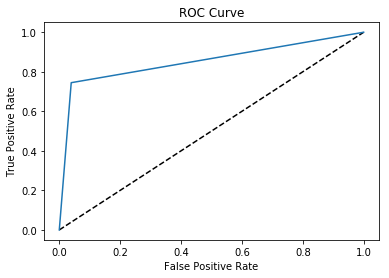

In [275]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred2_rfc)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [276]:
roc_auc_score(y_test,y_pred2_rfc)

0.8527968634981598

In [277]:
print(accuracy_score(y_test,y_pred2_rfc))

0.9247899719962661


# MODEL 3

In [282]:
from sklearn.svm import SVC

In [283]:
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [284]:
svc_c10_rbf = SVC(C=10,kernel="rbf")
svc_c10_rbf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [285]:
svc_c10_rbf.fit(train_imp,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [286]:
y_pred3_svc = svc_c10_rbf.predict(test_imp)
accuracy_score(y_test,y_pred3_svc)

0.8305107347646353

In [93]:
confusion_matrix(y_test,y_pred3_svc)

array([[6221,   28],
       [1243,    7]], dtype=int64)

In [287]:
print(classification_report(y_test,y_pred3_svc))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      6249
          1       0.20      0.01      0.01      1250

avg / total       0.73      0.83      0.76      7499



In [288]:
cohen_kappa_score(y_test,y_pred3_svc)

0.001831241167005171

# MODEL 4

In [289]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(scale_pos_weight=5.0)

In [290]:
%time XGB_model.fit(train_imp, y_train)

Wall time: 8.23 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5.0, seed=None,
       silent=True, subsample=1)

In [291]:
y_pred_XGB = XGB_model.predict(test_imp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [292]:
print(accuracy_score(y_test,y_pred))

0.9601280170689426


In [293]:
confusion_matrix(y_test,y_pred)

array([[6216,   33],
       [ 266,  984]], dtype=int64)

In [294]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      6249
          1       0.97      0.79      0.87      1250

avg / total       0.96      0.96      0.96      7499



In [295]:
from sklearn.model_selection import GridSearchCV

In [296]:
XGB = XGBClassifier(n_jobs=-1,scale_pos_weight=5.0) ## scale_pos_weights = NO/Yes
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9),
     'n_estimators':[50,100],
     'max_depth': [10, 15]
}
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [297]:
%time CV_XGB.fit(train_imp,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

KeyboardInterrupt: 

In [147]:
y_pred_XGB_grid =CV_XGB.predict(test_imp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [148]:
confusion_matrix(y_test,y_pred_XGB_grid)

array([[6216,   33],
       [ 266,  984]], dtype=int64)

In [149]:
print(classification_report(y_test,y_pred_XGB_grid))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      6249
          1       0.97      0.79      0.87      1250

avg / total       0.96      0.96      0.96      7499



In [150]:
from sklearn.metrics import cohen_kappa_score

In [151]:
cohen_kappa_score(y_test,y_pred_XGB_grid)

0.844913376115052

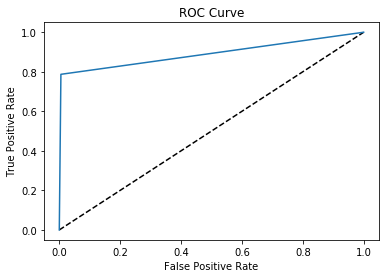

In [152]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB_grid)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [154]:
roc_auc_score(y_test, y_pred_XGB_grid)

0.8909595775324051

In [298]:
print(accuracy_scoreacy_scoreacy_scoreacy_scoreuracy_score(y_pred_XGB_grid)

SyntaxError: unexpected EOF while parsing (<ipython-input-298-5590be3fbd74>, line 1)

# MODEL 5

In [120]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [121]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 200,
    learning_rate = 1)

In [122]:
# Train model
%time Adaboost_model.fit(train_imp, y_train)

Wall time: 40.6 s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=200, random_state=None)

In [123]:
# Predict on Test 
Adaboost_pred = Adaboost_model.predict(test_imp)

In [124]:
# Verify accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Adaboost_pred))

0.9518602480330711


In [125]:
# TUning the Model
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1)), param_grid, n_jobs=-1)

In [128]:
# Train model
%time Adaboost_model_clf.fit(train_imp, y_train)

Wall time: 1min 51s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
# Find best model
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 


0.9272446705149454 {'learning_rate': 0.9, 'n_estimators': 200}


In [131]:
best_ada_pred = best_ada_model.predict(test_imp)

In [133]:
print(confusion_matrix(y_test,best_ada_pred))

[[6106  143]
 [ 436  814]]


In [134]:
print(classification_report(y_test,best_ada_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95      6249
          1       0.85      0.65      0.74      1250

avg / total       0.92      0.92      0.92      7499



In [135]:
cohen_kappa_score(y_test,best_ada_pred)

0.6933193612874549

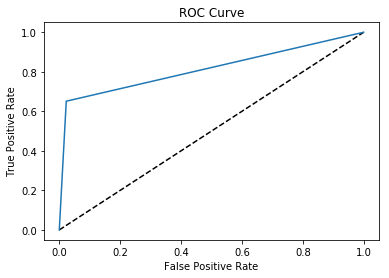

In [136]:
fpr, tpr, thresholds = roc_curve(y_test,best_ada_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [137]:
# Area undr Curve
roc_auc_score(y_test,best_ada_pred)

0.8141581693070892